#Convolutional Neural Networks in Python with Keras Tutorial
Tutorial author:  Aditya Sharma

**The Dataset:**  Fashion-MINIST dataset

Zalando's article images

28x28 grayscale images

70,000 fashion products

10 categories, 7,000 images per category





In [1]:
# Load the Fashion MINIST dataset from the Keras datasets library
# The train and test images with associated labels will be loaded and stored in the variables: train_X, train_Y, test_X, test_Y

from keras.datasets import fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


### Data Analysis

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

# View the dimensions of the dataset

print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [3]:
# View unique classes 

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Unique output classes: ', classes)

Total number of outputs:  10
Unique output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

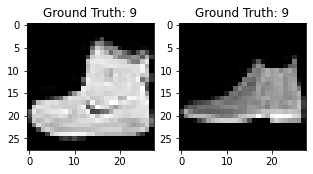

In [4]:
# View the first image in the training and testing datasets

plt.figure(figsize=[5,5])

# look at first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

# look at first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

###Data Preprocessing

In [5]:
# Each grayscale pixel has a value that ranges from 0-255, with 255 being black and 0 being white

# Convert each 28x28 image of the train and test sets into a matrix of size 28x28x1 to feed into the network

train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Change data type from int8 to float32
# rescale pixel values to be in range 0-1 

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X/255.
test_X = test_X/255. 

In [7]:
# Convert class labels from categorical to one-hot encoded vectors

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label: ', train_Y[0])
print('One Hot Encoded label: ', train_Y_one_hot[0])


Original label:  9
One Hot Encoded label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
# Split training data into 80% training and 20% validation sets

from sklearn.model_selection import train_test_split

train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 13)

In [9]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape 

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

###Build the Network

Layer Sequence
*   Input: 1 28x28x1 image
*   Convolutional Layer 1: 32, 3x3 filters
*   Max Pooling Layer 1: 2x2
*   Convolutional Layer 2: 64, 3x3 filters
*   Max Pooling Layer 2: 2x2
*   Convolutional Layer 3: 128, 3x3 filters
*   Max Pooling Layer 3: 2x2
*   Flattening layer
*   Dense Layer: 128 units
*   Output Layer: 10 units











In [10]:
# Import necessary modules

import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
# Set batch size, epochs, and number of classes
# will use batch size of 64 here, however batch sizes of 128 or 256 are preferrable depending on memory

batch_size = 64
epochs = 20
num_classes = 10

In [12]:
# Construct Model Architecture
# Activation function = Leaky ReLU (does not allow for a value to go to 0 and die out, instead will give small negative slope)

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape = (28,28,1), padding='same',))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [13]:
# Compile the model
# Optimizer = Adam, Loss = Categorical Cross Entropy, metrics = accuracy

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [14]:
# View model summary
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

###Train the Model on Training Data, Validate on the Validation Data, Evaluate on the Test Data



In [15]:
# Train model for 20 epochs, batch size = 64

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 90s 119ms/step - loss: 0.4731 - accuracy: 0.8275 - val_loss: 0.3513 - val_accuracy: 0.8744
Epoch 2/20
750/750 [==============================] - 89s 118ms/step - loss: 0.2957 - accuracy: 0.8924 - val_loss: 0.2809 - val_accuracy: 0.8960
Epoch 3/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2432 - accuracy: 0.9106 - val_loss: 0.2786 - val_accuracy: 0.8989
Epoch 4/20
750/750 [==============================] - 91s 122ms/step - loss: 0.2114 - accuracy: 0.9229 - val_loss: 0.2413 - val_accuracy: 0.9116
Epoch 5/20
750/750 [==============================] - 88s 118ms/step - loss: 0.1835 - accuracy: 0.9317 - val_loss: 0.2308 - val_accuracy: 0.9182
Epoch 6/20
750/750 [==============================] - 89s 119ms/step - loss: 0.1595 - accuracy: 0.9413 - val_loss: 0.2395 - val_accuracy: 0.9172
Epoch 7/20
750/750 [==============================] - 89s 118ms/step - loss: 0.1391 - accuracy: 0.9484 - val_loss: 0.2439 - val_ac

In [16]:
# Evaluate on the Test Set

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test Loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test Loss:  0.45936957001686096
Test accuracy:  0.9222999811172485


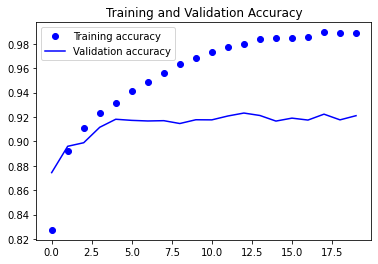

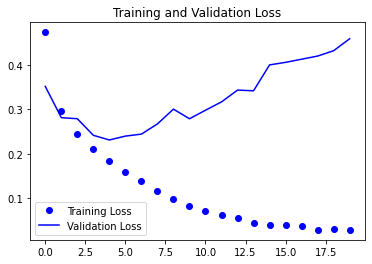

In [17]:
# Plot the accuracy and losss between the training and validation sets

accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Validation accuracy plateaued after 4-5 epochs.  The validation loss starts to increase after 4-5 epochs.  This indicates the model is memorizing the training data and overfitting.  To help mitigate this problem, dropout layers can be added.

Dropout layers will randomly deactivate a fraction of the nodes during the training process, reducing the dependancy on the training data.  Random Deactivation of some of the nodes during training will not allow the network to memorize the training data since not all of the nodes will be active at the same time.

###Adding Dropout Layers to the Network

In [18]:
# Re-construct Model Architecture with Addition of 4 Dropout layers
# Activation function = Leaky ReLU (does not allow for a value to go to 0 and die out, instead will give small negative slope)

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape = (28,28,1), padding='same',))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [19]:
# Look at summary or new model

fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [20]:
# Compile new model
# Optimizer = Adam, Loss = Categorical Cross Entropy, metrics = accuracy

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [21]:
# Train the new Model
# 20 epochs, batch size is 64

fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=20, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 96s 128ms/step - loss: 0.6056 - accuracy: 0.7760 - val_loss: 0.3935 - val_accuracy: 0.8512
Epoch 2/20
750/750 [==============================] - 97s 130ms/step - loss: 0.3783 - accuracy: 0.8616 - val_loss: 0.3180 - val_accuracy: 0.8817
Epoch 3/20
750/750 [==============================] - 95s 126ms/step - loss: 0.3274 - accuracy: 0.8780 - val_loss: 0.2841 - val_accuracy: 0.8953
Epoch 4/20
750/750 [==============================] - 95s 126ms/step - loss: 0.2971 - accuracy: 0.8903 - val_loss: 0.2671 - val_accuracy: 0.9021
Epoch 5/20
750/750 [==============================] - 98s 130ms/step - loss: 0.2821 - accuracy: 0.8960 - val_loss: 0.2598 - val_accuracy: 0.9045
Epoch 6/20
750/750 [==============================] - 95s 127ms/step - loss: 0.2678 - accuracy: 0.9000 - val_loss: 0.2420 - val_accuracy: 0.9103
Epoch 7/20
750/750 [==============================] - 94s 126ms/step - loss: 0.2606 - accuracy: 0.9032 - val_loss: 0.2402 - val_ac

Adding the Dropout Layers did not greatly improve the testing accuracy, however there was a significant decrease in the test loss

In [22]:
# Save the new model

fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [23]:
# Evaluate the new model

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

313/313 [==============================] - 6s 19ms/step - loss: 0.2373 - accuracy: 0.9158
Test loss:  0.23725585639476776
Test accuracy:  0.9157999753952026


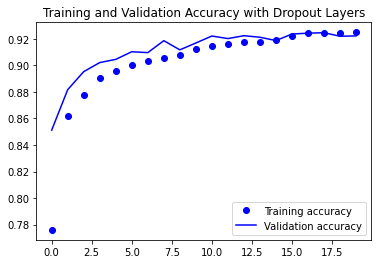

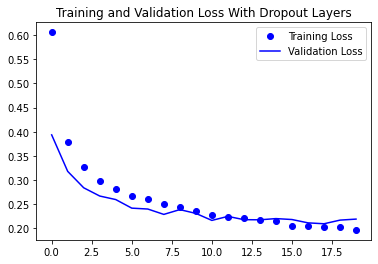

In [24]:
# Plot the accuracy and losss between the training and validation sets

accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy with Dropout Layers')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss With Dropout Layers')
plt.legend()

plt.show()

The validation loss and the validation accuracy for the updated model are trending together.  The model is no longer overfitting.  For this model, the validation loss is decreasing with progressive epochs and there is not much of a gap between the training and validation accuracy.

This model is much more generalizable to new data.

###Make Predictions with Test Set

In [25]:
# Predictions given from the model are floating point values (probabilities), so to make comparisons between the test predictions and the test labels 
# the predictions output will need to be rounded to 1 or 0

predicted_classes = fashion_model.predict(test_X)
# return the index of the highest predicted value
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
#make sure prediction and test sets have the same number of values
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found  9133  correct labels


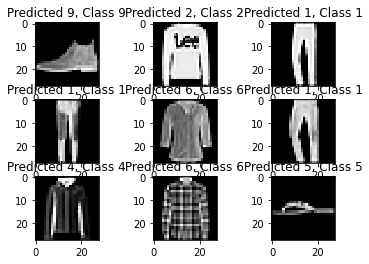

In [26]:
# Find the total number of correctly predicted labels and show the top 9 correctly labeled images

correct = np.where(predicted_classes == test_Y)[0]
print("Found ", len(correct), " correct labels")

for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
  plt.tight_layout()

Found  867  incorrect labels


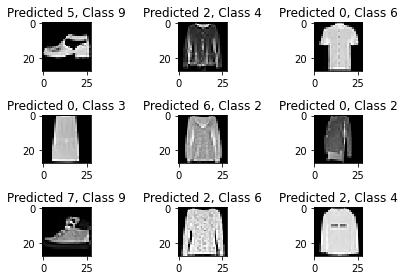

In [28]:
# Find the total number of incorrectly predicted labels and show the top 9 incorrectly labeled images

incorrect = np.where(predicted_classes != test_Y)[0]
print("Found ", len(incorrect), " incorrect labels")

for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
  plt.tight_layout()

Looks like the network made misclassifications on items that are similar in sihouette - for example shirts and jackets

###Classification Report

In [27]:
# print classification report to help identify misclassified classes in more detail
# classification report will offer insight on which classes the model performed poorly on

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.92      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.83      0.91      0.87      1000
     Class 3       0.91      0.94      0.93      1000
     Class 4       0.90      0.81      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.84      0.69      0.75      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



The model is underperforming on class 6.  It also appears to be having some difficulty on class 2 and class 4 

Source:
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

Thank you to Aditya Sharma for providing the valuable learning resource